In [1]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_table("predicted_vs_true.tsv")
df

,Acession code,Predicted,True
0,Q13015,0,0
1,P04921,0,0
2,Q8BG31,0,0
3,Q03482,0,0
4,O94428,0,0
...,...,...,...
2119,P05367,1,1
2120,P31723,1,1
2121,P16150,1,1
2122,Q05928,1,1


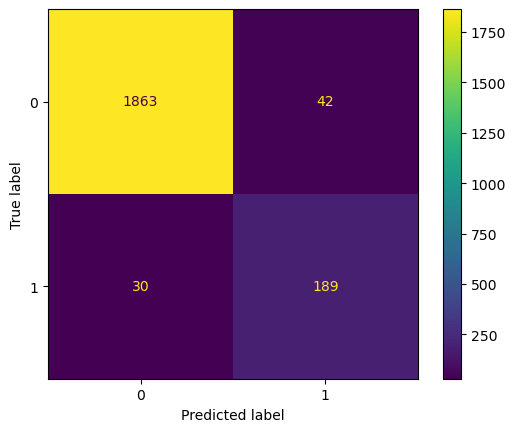

In [4]:
y_true=df["True"].to_list()
y_pred=df["Predicted"].to_list()
cm=metrics.confusion_matrix(y_true,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(cm).plot()

In [5]:
df["Transit peptide"]=0
df["Transmembrane"]=0

In [6]:
df_transmem_transit=pd.read_table("./results study/transit_transmem.tsv", header=None)
df_transmem_transit.rename(columns={0:"Acession code", 1:"Transit peptide", 2:"Transmembrane"}, inplace=True)

In [7]:
conditions = [
    (df['True'] == 1) & (df['Predicted'] == 1),
    (df['True'] == 0) & (df['Predicted'] == 0),
    (df['True'] == 0) & (df['Predicted'] == 1),
    (df['True'] == 1) & (df['Predicted'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['TP', 'TN', 'FP', 'FN']

df['Test result'] = np.select(conditions, values)

In [9]:
df_merged=df.merge(df_transmem_transit, on='Acession code', how='left')
df_merged.drop(columns=['Transit peptide_x', 'Transmembrane_x'], inplace=True)
df_merged.fillna(0, inplace=True)
df_merged["Transit peptide_y"]=df_merged["Transit peptide_y"].astype(int)
df_merged["Transmembrane_y"]=df_merged["Transmembrane_y"].astype(int)

df_group_TR=df_merged.groupby(['Test result',  "Transit peptide_y","Transmembrane_y"]).count()

df_group_TR.drop(columns=['Predicted', 'True'], inplace=True)
df_grouped_drop=df_group_TR.drop(["FN","TP"])
df_grouped_drop

Acession code
Test result Transit peptide_y Transmembrane_y               
FP          0                 0                           12
                              1                            3
            1                 0                           26
                              1                            1
TN          0                 0                         1513
                              1                          216
            1                 0                          123
                              1                           11

In [13]:
df_TN=pd.DataFrame(df_grouped_drop.loc[("TN")].value_counts())
df_TN=df_TN.reset_index()
df_TN["index"]=["Both","Transit peptide","Transmembrane","None"]
df_TN=df_TN.set_index(df_TN["index"])

In [17]:
pd.DataFrame(df_grouped_drop.loc[("TN")].value_counts())

,count
Acession code,
11,1
123,1
216,1
1513,1


In [20]:
df_FP=pd.DataFrame(df_grouped_drop.loc[("FP")].value_counts())
df_FP=df_FP.reset_index()
df_FP["index"]=["Both","Transmembrane","Transit peptide","None"]
df_FP=df_FP.set_index(df_FP["index"])


In [21]:
property_colors={
    'True negatives (TN)': "#758173",
    'False positives (FP)': "#828C51",
    }

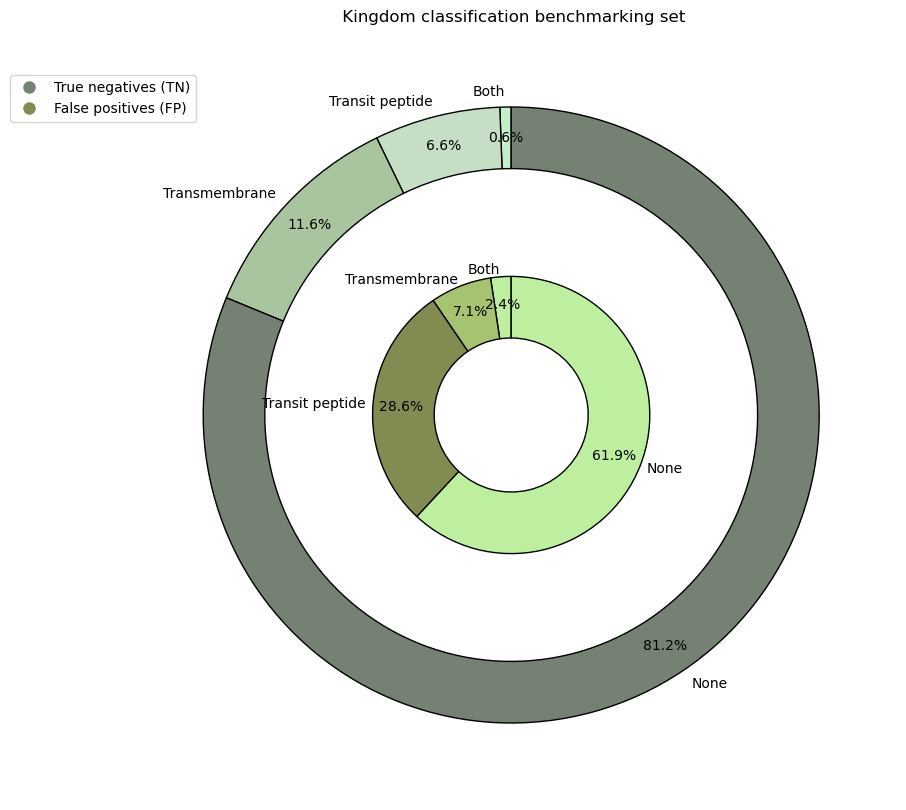

In [22]:
colors1=["#C5EFCB","#C6DEC6","#A9C5A0","#758173"]
colors2=["#BEEF9E","#A6C36F","#828C51"]
explode = (0.03,0.03,0.03,0.03)

plt.figure(figsize=(14,10))
plt.title(" Kingdom classification benchmarking set")

plt.pie(df_TN["Acession code"], labels=df_TN.index, labeldistance=1.05,radius=1, shadow=False, autopct="%.1f%%", wedgeprops=dict(width=0.2, edgecolor='Black'), startangle=90,pctdistance=0.9, textprops={'color':'Black'}, colors=colors1 )
plt.pie(df_FP["Acession code"],labels=df_FP.index, radius=0.45, labeldistance=1.05 ,shadow=False, autopct="%.1f%%",  wedgeprops=dict(width=0.2, edgecolor='Black'), startangle=90,pctdistance=0.8,  textprops={'color':'Black'}, colors=colors2)
legend_labels = {color: property for property, color in property_colors.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                  for color, label in legend_labels.items()]
plt.legend(handles=legend_handles,  bbox_to_anchor=(0.1,0.95))

plt.show()

In [4]:
df=df[df["True"]==1]
df=df[df["Predicted"]==0]
df

,Acession code,Predicted,True
1906,O96559,0,1
1908,A0A7J6K7I9,0,1
1926,O75462,0,1
1927,P01920,0,1
1930,Q6ZSA7,0,1
1941,U6BLZ9,0,1
1945,Q08481,0,1
1948,P48765,0,1
1962,Q8BPM6,0,1
1970,Q63415,0,1


In [5]:
list_FN=df["Acession code"].to_list()
print(len(list_FN))

30


In [6]:
df=pd.read_table("predicted_vs_true.tsv")
df=df[df["True"]==1]
list_TP=df["Acession code"].to_list()
print(len(list_TP))

219


In [7]:
dft=pd.read_table("training_set_parsed_totc.tsv", names=["seq","class","AC"])
dft=dft[dft["class"]==1]
list_pos_training=dft["AC"].to_list()
print(len(list_pos_training))

874


In [8]:
bench_df=pd.read_table("SETs/benchmarking_set_parsed_totc.tsv", names=["SP", "sequence", "class", "code"])
train_df=pd.read_table("training_set_parsed_totc.tsv", names=["SP","seq","class","AC"])


In [9]:
FN=bench_df[bench_df["code"].isin(list_FN)]
FN_l=FN["sequence"].to_list()
TP=bench_df[bench_df["code"].isin(list_TP)]
TP_l=TP["sequence"].to_list()
train_pos=train_df[train_df["AC"].isin(list_pos_training)]
postrain_l=train_pos["seq"].to_list()


In [10]:
FN=[]
for seq in FN_l:
    sequence=seq[0:23]
    FN.append(sequence)
TP=[]
for seq in TP_l:
    sequence=seq[0:23]
    TP.append(sequence) 
pos_train=[]
for seq in TP_l:
    sequence=seq[0:23]
    pos_train.append(sequence) 

In [11]:
def aa_dict_creation(seqs,aa_lst):
    aa_dict = {letter: 0 for letter in aa_lst}
    for seq in seqs:
        for aa in aa_lst:
            aa_dict[aa]+= seq.count(aa)
    s = sum(aa_dict.values())
    for k, v in aa_dict.items():
        aa_dict[k] = (v/s)* 100.0
    
    return aa_dict

In [12]:
aas = "GAVPLIMFWYSTCNQHDEKR"

aa_comp_tp_22=aa_dict_creation(TP,aas)
aa_comp_fn_22=aa_dict_creation(FN,aas)
aa_comp_training_22=aa_dict_creation(pos_train,aas)

Text(0, 0.5, 'Frequency (%)')

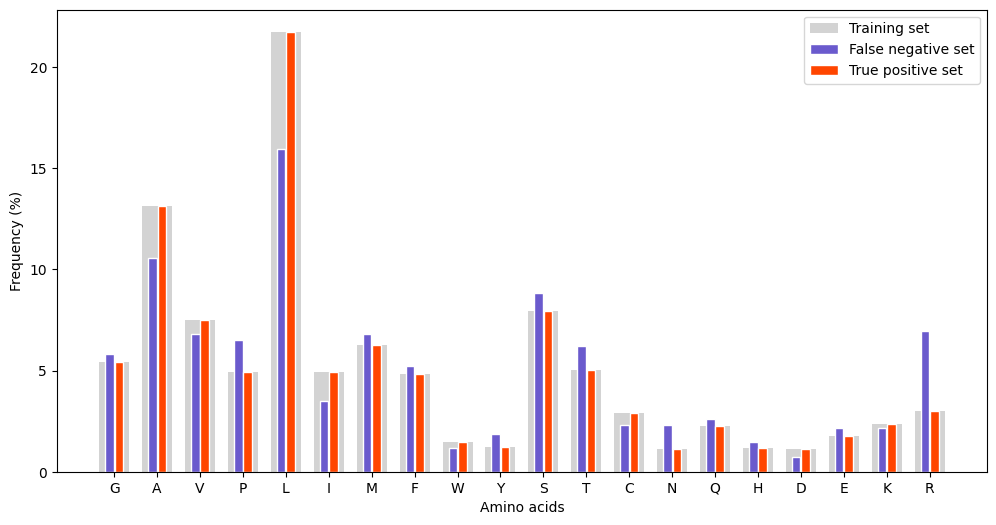

In [13]:
X = list(aa_comp_tp_22.keys())


X_axis=np.arange(len(X))
width=0.25

plt.figure(figsize=(12,6))
plt.bar(X_axis  + 0, aa_comp_training_22.values(),0.7, tick_label=X, label="Training set", color="lightgrey")
plt.bar(X_axis - 0.11, aa_comp_fn_22.values(),width=0.2, tick_label=X, label="False negative set", color='slateblue',ec="white")
plt.bar(X_axis + 0.11, aa_comp_tp_22.values(),width=0.2, tick_label=X, label="True positive set", color='orangered',ec="white")
plt.xticks(X_axis, X)

plt.legend()
plt.xlabel("Amino acids")
plt.ylabel("Frequency (%)")

In [14]:
train_df

,SP,seq,class,AC
0,NaN,MCSPTNFLYEPFSSDAVTQNYDQNLKCTKCGAYYSMACSLREQNVW...,0,P38769
1,NaN,MALLRPHLHRFHSNTLRHSAYPSADAGGGLVVYPTYGRHRCSAIAI...,0,P49599
2,NaN,MDTPLRRSRRLEGLKPLSPENLPVPEVSRAKRALVDFKSNSEETGE...,0,Q9JJ89
3,NaN,MASRWQNMGTSVRRRSLQHQEQLEDSKELQPVVSHQETSVGALGSL...,0,Q9BSJ6
4,NaN,MAAIGVHLGCTSACVAVYKDGRAGVVANDAGDRVTPAVVAYSENEE...,0,Q0VDF9
...,...,...,...,...
8487,15.0,MKVFVVLAAIVAIANGLTSGSGVTTRYWDCCKPSCSWGGKASVTKP...,1,D3GDK4
8488,21.0,MKALLALPLLLLLSTPPCAPQVSGIRGDALERFCLQQPLDCDDIYA...,1,P55083
8489,28.0,MKVFPALTSALVALGTAGVEAEHVQRSLVMGGGTVPVGAKTYTVGL...,1,Q945U0
8490,22.0,MNAKTLFVVFLIGMLVTEQVEAGIWSSIKNLASKAWNSDIGQSLRN...,1,F1AWB0


In [ ]:

sns.kdeplot(data=trn_pos["SP"], x=trn_pos["SP"], label="Training set", color='grey')
sns.kdeplot(data=tp["SP"], x=tp["SP"], label="True positive", color='green')
sns.kdeplot(data=fn["SP"], x=fn["SP"], label="False negative", color='red')


plt.legend()
plt.xlabel("Signal peptide length (aa)")
plt.ylabel("Number of sequences (normalised)")

In [15]:
tp=bench_df[bench_df["code"].isin(list_TP)]
fn=bench_df[bench_df["code"].isin(list_FN)]
trn_pos=train_df[train_df["AC"].isin(list_pos_training)]

In [ ]:
tp.to_csv("tp_giacomo.tsv",sep="\t")
fn.to_csv("fn_giacomo.tsv",sep="\t")
trn_pos.to_csv("train_pos_giacomo.tsv",sep="\t")

In [157]:
tp=bench_df[bench_df["code"].isin(list_TP)]
fn=bench_df[bench_df["code"].isin(list_FN)]
trn_pos=train_df[train_df["AC"].isin(list_pos_training)]

tp_vc=pd.DataFrame(tp["SP"].value_counts())
tp_vc["norm"]=tp_vc["count"]/tp["SP"].count()
tp_vc

fn_vc=pd.DataFrame(fn["SP"].value_counts())
fn_vc["norm"]=fn_vc["count"]/fn["SP"].count()
fn_vc

pt_vc=pd.DataFrame(trn_pos["SP"].value_counts())
pt_vc["norm"]=pt_vc["count"]/trn_pos["SP"].count()
pt_vc

,count,norm
SP,,
19.0,93,0.106407
20.0,80,0.091533
22.0,73,0.083524
24.0,71,0.081236
21.0,65,0.074371
23.0,65,0.074371
18.0,61,0.069794
25.0,54,0.061785
26.0,46,0.052632


No handles with labels found to put in legend.


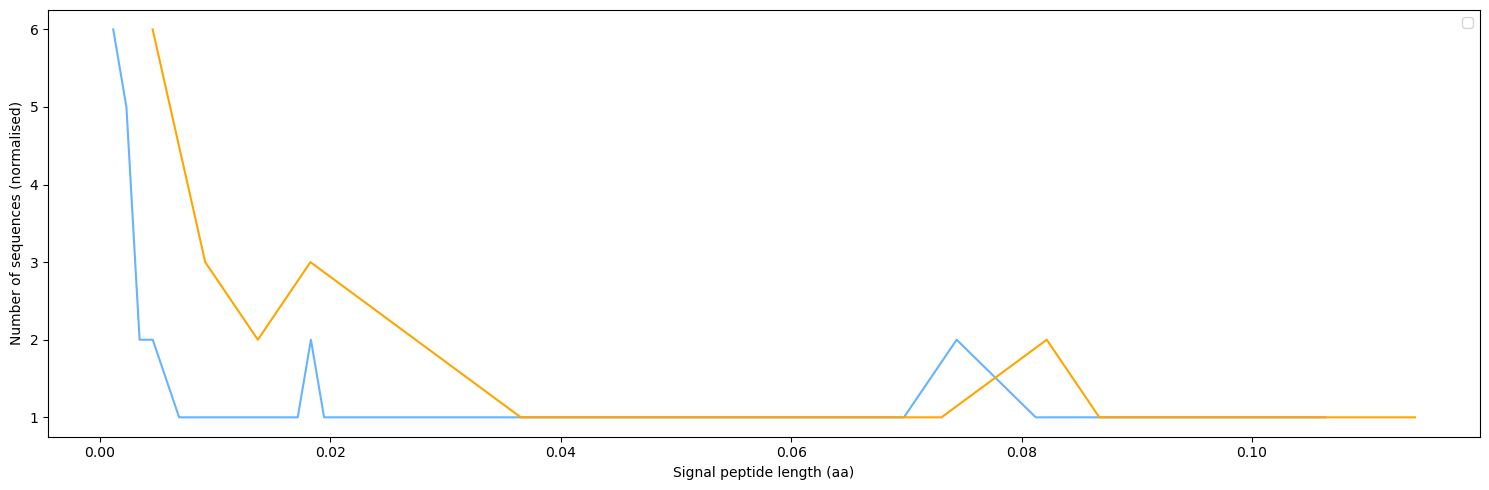

In [166]:
plt.figure(figsize=(15, 5))

plt.plot(pt_vc["norm"].value_counts().sort_index(), color = '#66b3ff')
plt.plot(tp_vc["norm"].value_counts().sort_index(), color= "orange")




plt.legend()
plt.xlabel("Signal peptide length (aa)")
plt.ylabel("Number of sequences (normalised)")
plt.tight_layout()
plt.show()